In [1]:
## Dates and Times in Python

from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [2]:
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [3]:
date.strftime('%A') # day of week

'Saturday'

In [5]:
## Typed arrays of times in Numpy

import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [6]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [7]:
np.datetime64('2015-07-04') # day-based datetime

numpy.datetime64('2015-07-04')

In [8]:
np.datetime64('2015-07-04 12:00') # minute-based datetime

numpy.datetime64('2015-07-04T12:00')

In [9]:
np.datetime64('2015-07-04 12:59:59.50', 'ns') # force nano-second datetime

numpy.datetime64('2015-07-04T12:59:59.500000000')

In [10]:
## Dates and Times in Pandas

In [11]:
import pandas as pd

In [12]:
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [13]:
date.strftime('%A')

'Saturday'

In [14]:
# can do vectorized operations directly on the object
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

In [15]:
## Indexing by Time

In [16]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [17]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [18]:
data['2015']  # special date-only index slice to get all data from a year

2015-07-04    2
2015-08-04    3
dtype: int64

In [19]:
## Time Series Data Structures

In [20]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [21]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [22]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [23]:
# Date sequences

In [24]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [25]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [26]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

In [27]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [28]:
## Frequencies and Offsets

In [30]:
pd.timedelta_range(0, periods=9, freq='2H30T')  # 2 1/2 hour splits

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [31]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay())  # business day offsets

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

In [32]:
## Resampling, Shifting, Windowing

In [88]:
from pandas_datareader import data

goog = data.DataReader('GOOG', start='2004', end='2016',
                      data_source='morningstar')
goog.head()

Close      High       Low      Open  Volume
Symbol Date                                                      
GOOG   2014-03-27  556.9312  566.4451  551.4064  566.4451   13087
       2014-03-28  558.4570  564.8794  557.1406  559.7136   41115
       2014-03-31  555.4453  565.4478  555.4054  565.3381   10801
       2014-04-01  565.6074  566.8939  557.1805  557.1805    7953
       2014-04-02  565.4478  603.1743  560.6510  579.1702  147099

In [89]:
goog = goog['Close']

In [102]:
goog.index = goog.index.droplevel(['Symbol'])

In [122]:
goog = goog.to_frame()

In [123]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

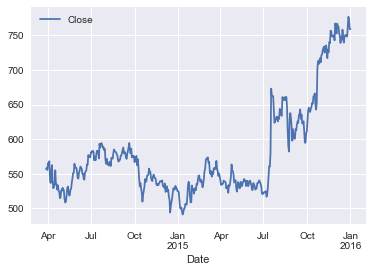

In [124]:
goog.plot();

In [125]:
## Resampling and converting frequencies

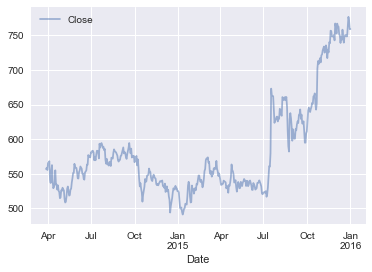

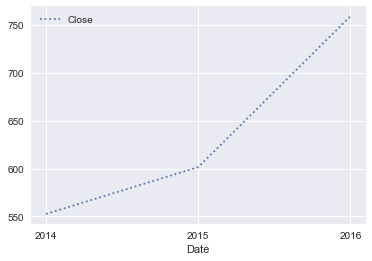

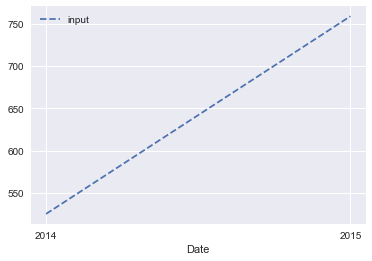

In [126]:
goog.plot(alpha=.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--')
plt.legend(['input', 'resample', 'asfreq'], loc='upper left');

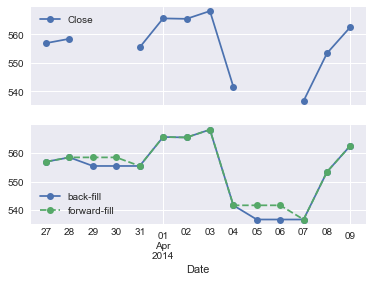

In [127]:
# resample business day data at a daily frequency

fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"])

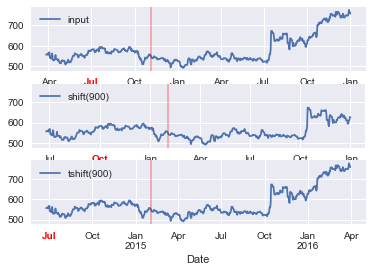

In [135]:
fig, ax = plt.subplots(3, sharey=True)

# apply a frequency to the data
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(90).plot(ax=ax[1])
goog.tshift(90).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2014-11-05')
offset = pd.Timedelta(90, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

Text(0,0.5,'% Return on Investment')

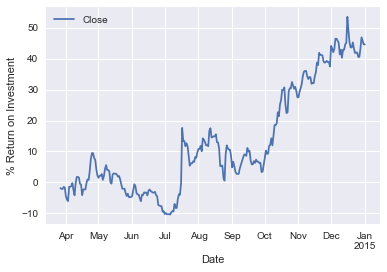

In [138]:
ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment')

In [139]:
## Rolling Windows

In [152]:
goog.head()

,Close
Date,
2014-03-27,556.9312
2014-03-28,558.4570
2014-03-29,558.4570
2014-03-30,558.4570
2014-03-31,555.4453


In [149]:
rolling = goog.rolling(365, center=True)

data = pd.DataFrame({'input': goog,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

ValueError: If using all scalar values, you must pass an index

In [153]:
## Example: Visualizing Seattle Bicycle Counts

In [155]:
# use Date as index, and automatically parse dates
data = pd.read_csv('data/FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


In [156]:
data.shape

(48144, 2)

In [157]:
data.index

DatetimeIndex(['2012-10-03 00:00:00', '2012-10-03 01:00:00',
               '2012-10-03 02:00:00', '2012-10-03 03:00:00',
               '2012-10-03 04:00:00', '2012-10-03 05:00:00',
               '2012-10-03 06:00:00', '2012-10-03 07:00:00',
               '2012-10-03 08:00:00', '2012-10-03 09:00:00',
               ...
               '2018-03-31 14:00:00', '2018-03-31 15:00:00',
               '2018-03-31 16:00:00', '2018-03-31 17:00:00',
               '2018-03-31 18:00:00', '2018-03-31 19:00:00',
               '2018-03-31 20:00:00', '2018-03-31 21:00:00',
               '2018-03-31 22:00:00', '2018-03-31 23:00:00'],
              dtype='datetime64[ns]', name='Date', length=48144, freq=None)

In [158]:
data.columns = ['West', 'East']
data['Total'] = data['West'] + data['East']  # or data.eval('West + East')

In [159]:
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


In [160]:
data.dropna().describe()  # get some summary stats

,West,East,Total
count,48136.000000,48136.000000,48136.000000
mean,54.569179,55.049422,109.618601
std,72.980790,79.668609,138.591455
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,29.000000,28.000000,59.000000
75%,71.000000,67.000000,143.000000
max,854.000000,717.000000,1165.000000


In [161]:
# plot the raw data

import seaborn; seaborn.set()

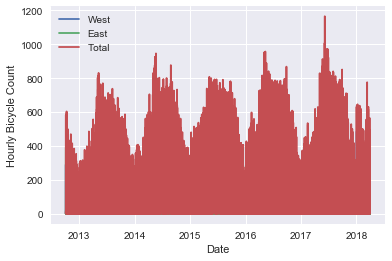

In [162]:
data.plot()
plt.ylabel('Hourly Bicycle Count');

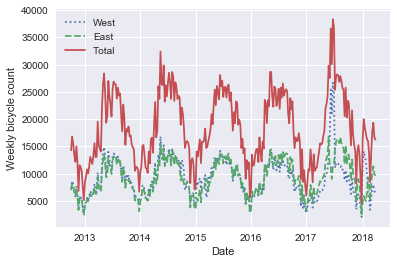

In [163]:
# resample to coarser grid, like a week

weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');

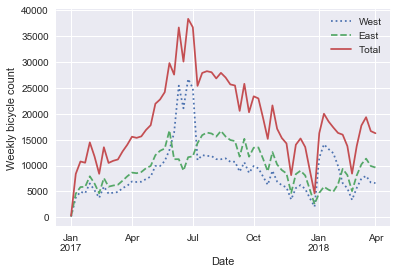

In [165]:
investigate = data['2017':'2018']
weekly = investigate.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');

Text(0,0.5,'mean hourly count')

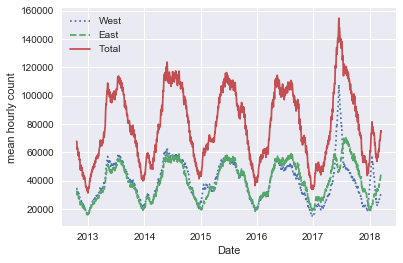

In [166]:
# 30-day rolling mean of the data, making sure to center it

daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count')

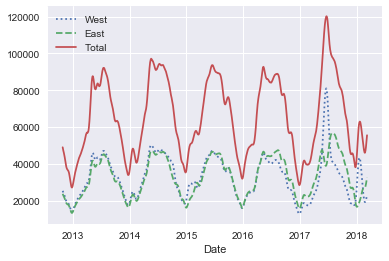

In [167]:
# get smoother with Gaussian window
daily.rolling(50, center=True,
             win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);

In [168]:
# Digging in

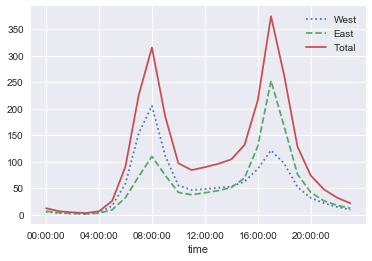

In [169]:
# average traffic by time of day

by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

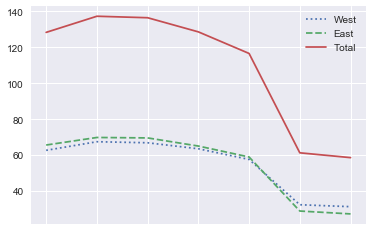

In [173]:
# how about day of the week

by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

In [174]:
# compare hourly weekday vs weekend
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

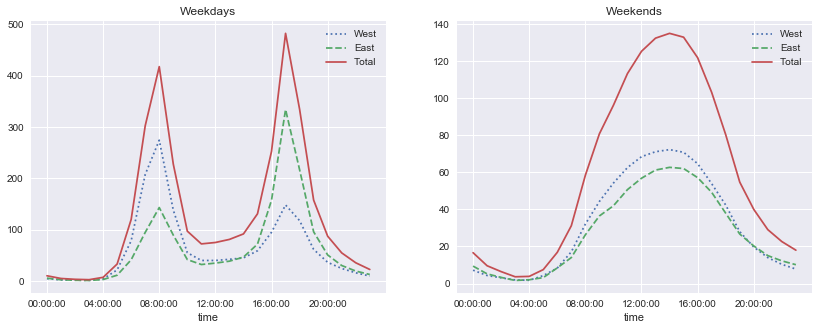

In [177]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                          xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                          xticks=hourly_ticks, style=[':', '--', '-']);